# Descriptives

In [1]:
import pandas as pd

data = pd.read_csv('C:\\Users\\ANGIE\\Desktop\\abcf\\processed_esti.csv')

print(data.head())


   y  w  gender_female  gender_male  gender_transgender  ethnicgrp_asian  \
0  1  1              0            1                   0                0   
1  0  0              0            1                   0                0   
2  0  1              0            1                   0                0   
3  0  0              1            0                   0                0   
4  1  1              1            0                   0                1   

   ethnicgrp_black  ethnicgrp_mixed_multiple  ethnicgrp_other  \
0                0                         1                0   
1                0                         0                0   
2                1                         0                0   
3                0                         0                0   
4                0                         0                0   

   ethnicgrp_white  partners1  postlaunch  msm  age  imd_decile  
0                0          0           1    0   27           5  
1                1  

In [56]:
## Descriptive
# Pregunta 1
treated = data[data['w'] == 1]
control = data[data['w'] == 0]

In [57]:
import statsmodels.api as sm

In [58]:
variables_to_describe = ['age', 'gender_male', 'imd_decile']

In [59]:
results = pd.DataFrame()

In [60]:
for var in variables_to_describe:
    # Describir estadísticas para cada grupo
    treated_desc = treated[var].describe()
    control_desc = control[var].describe()
    
    # Regresión para obtener la diferencia ajustada
    X = sm.add_constant(data['w'])  # w como variable independiente
    model = sm.OLS(data[var], X).fit()
    diff = model.params['w']  # Coeficiente para w
    
    # Compilar resultados en un dataframe
    results[var] = [
        control_desc['count'], control_desc['mean'], control_desc['std'],
        treated_desc['count'], treated_desc['mean'], treated_desc['std'],
        diff
    ]


In [61]:
results.index = ['n_control', 'mean_control', 'std_control', 'n_treated', 'mean_treated', 'std_treated', 'Diff']


In [62]:
results = results.T

print(results)

             n_control  mean_control  std_control  n_treated  mean_treated  \
age              818.0     23.047677     3.594015      921.0     23.158523   
gender_male      818.0      0.418093     0.493547      921.0      0.409338   
imd_decile       818.0      3.484108     1.486081      921.0      3.460369   

             std_treated      Diff  
age             3.538738  0.110846  
gender_male     0.491979 -0.008755  
imd_decile      1.465844 -0.023738  


In [11]:
pip install python-docx


   ---------------------------------------- 0.0/244.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/244.3 kB ? eta -:--:--
   --- ----------------------------------- 20.5/244.3 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/244.3 kB 325.1 kB/s eta 0:00:01
   --------------- ---------------------- 102.4/244.3 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 244.3/244.3 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [63]:
from docx import Document

In [64]:
from docx.shared import Pt

In [65]:
doc = Document()
style = doc.styles['Normal']
font = style.font
font.name = 'Times New Roman'
font.size = Pt(11)
doc.add_heading('Table 1: Descriptive Statistics and Balance', level=1)


In [66]:
table = doc.add_table(rows=1, cols=8)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable'
hdr_cells[1].text = 'n (Control)'
hdr_cells[2].text = 'Mean (Control)'
hdr_cells[3].text = 'SD (Control)'
hdr_cells[4].text = 'n (Treatment)'
hdr_cells[5].text = 'Mean (Treatment)'
hdr_cells[6].text = 'SD (Treatment)'
hdr_cells[7].text = 'Diff'

In [68]:
for var in variables_to_describe:
    treated_desc = treated[var].describe()
    control_desc = control[var].describe()
    X = sm.add_constant(data['w'])
    model = sm.OLS(data[var], X).fit()
    diff = model.params['w']

    row_cells = table.add_row().cells
    row_cells[0].text = var
    row_cells[1].text = str(int(control_desc['count']))
    row_cells[2].text = f"{control_desc['mean']:.2f}"
    row_cells[3].text = f"{control_desc['std']:.2f}"
    row_cells[4].text = str(int(treated_desc['count']))
    row_cells[5].text = f"{treated_desc['mean']:.2f}"
    row_cells[6].text = f"{treated_desc['std']:.2f}"
    row_cells[7].text = f"{diff:.3f}"


In [69]:
for row in table.rows:
    for cell in row.cells:
        paragraphs = cell.paragraphs
        for paragraph in paragraphs:
            paragraph.style = doc.styles['Normal']
            paragraph.runs[0].font.size = Pt(10)


In [78]:
doc.save('balancetable.docx')

In [79]:
##Descriptive. Pregunta 2
!pip install matplotlib
!pip install pandas



In [80]:
import matplotlib.pyplot as plt

In [81]:
plt.figure(figsize=(12, 18))

<Figure size 1200x1800 with 0 Axes>

<Figure size 1200x1800 with 0 Axes>

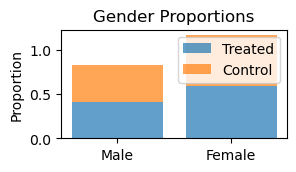

In [82]:
plt.subplot(3, 2, 2)
plt.bar(['Male', 'Female'], [treated['gender_male'].mean(), 1 - treated['gender_male'].mean()], alpha=0.7, label='Treated')
plt.bar(['Male', 'Female'], [control['gender_male'].mean(), 1 - control['gender_male'].mean()], alpha=0.7, label='Control', bottom=[treated['gender_male'].mean(), 1 - treated['gender_male'].mean()])
plt.title('Gender Proportions')
plt.ylabel('Proportion')
plt.legend()

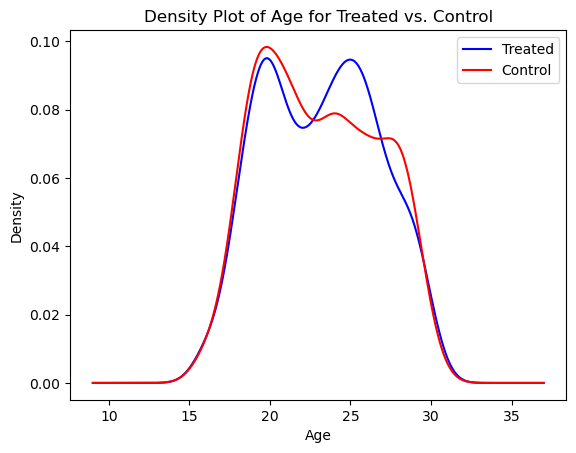

In [83]:
treated['age'].plot(kind='density', label='Treated', color='blue')
control['age'].plot(kind='density', label='Control', color='red')
plt.title('Density Plot of Age for Treated vs. Control')
plt.xlabel('Age')
plt.legend()
plt.show()


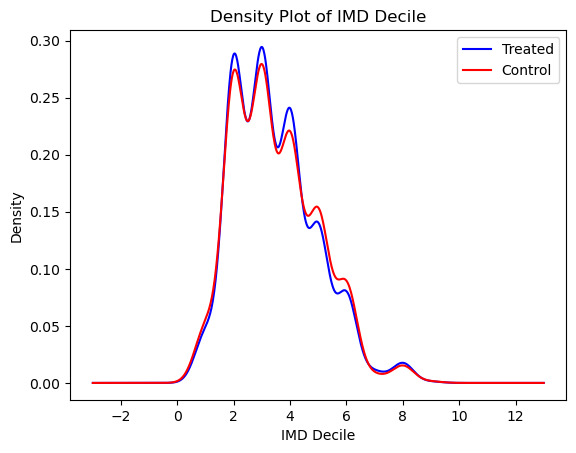

In [84]:
treated['imd_decile'].plot(kind='density', label='Treated', color='blue')
control['imd_decile'].plot(kind='density', label='Control', color='red')
plt.title('Density Plot of IMD Decile')
plt.xlabel('IMD Decile')
plt.legend()
plt.show()

# Linear Regression analysis

### Y ~ T

In [85]:
import statsmodels.formula.api as smf

In [86]:
result = smf.ols('y ~ w', data=data).fit()

In [87]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     144.5
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           4.96e-32
Time:                        19:37:32   Log-Likelihood:                -1112.9
No. Observations:                1739   AIC:                             2230.
Df Residuals:                    1737   BIC:                             2241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2115      0.016     13.174      0.0

Receiving the treatment is associated with an average increase in academic achievement scores of 0.2652 units. The treatment has a positive and significant effect on academic achievement scores. The R-squared value of 0.077 indicates that approximately 7.7% of the variability in academic achievement scores can be explained by the difference in treatment status among individuals. This suggests that there are other factors not captured in the model that significantly influence academic achievement outcomes.

### Y ~ T + X

In [2]:

import statsmodels.api as sm

Y = data['y']

X = data[['w', 'gender_female', 'gender_male', 'gender_transgender',
          'ethnicgrp_asian', 'ethnicgrp_black', 'ethnicgrp_mixed_multiple',
          'ethnicgrp_other', 'ethnicgrp_white', 'partners1', 'postlaunch', 
          'msm', 'age', 'imd_decile']]

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     18.64
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.76e-38
Time:                        12:19:15   Log-Likelihood:                -1076.4
No. Observations:                1739   AIC:                             2179.
Df Residuals:                    1726   BIC:                             2250.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

El resultado de la regresión sugiere que el uso del servicio de pruebas eSTI en línea tiene un efecto positivo significativo en el resultado medido: la tasa de detección o tratamiento exitoso de infecciones de transmisión sexual (ITS). Específicamente, el tratamiento aumenta el valor de y en aproximadamente 0.2562 unidades, manteniendo constantes las demás variables. La significancia estadística es muy alta (p < 0.001), lo que indica que es poco probable que este resultado sea debido al azar.

Sobre los controles: 

.-gender_male: Negativo y significativo (coeficiente = -0.1543, p = 0.017), sugiriendo que ser hombre está asociado con una reducción en el resultado y en comparación con la categoría de referencia (probablemente gender_transgender).

.-partners1: Negativo y significativo (coeficiente = -0.0576, p = 0.018), indicando que tener más de una pareja reduce el valor de y.

.-postlaunch: Positivo y significativo (coeficiente = 0.0748, p = 0.001), sugiriendo que el periodo postlanzamiento del servicio de pruebas tiene un efecto positivo en el resultado y.

.-age: Positivo y significativo (coeficiente = 0.0126, p = 0.000), indicando que la edad está positivamente asociada con el resultado y.

Los demás controles no son significativos, lo que sugiere que no hay diferencias sustanciales en el resultado y en función a dichas variables.

### Y ~ T + X DOUBLE LASSO

In [3]:
#Double Lasso con controles: Y ~ T + X
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

lasso = LassoCV(cv=10).fit(X_train, Y_train)

lasso_coef = pd.Series(lasso.coef_, index=X.columns)
print(lasso_coef)


const                       0.000000
w                           0.249733
gender_female               0.000000
gender_male                -0.097209
gender_transgender          0.000000
ethnicgrp_asian            -0.000000
ethnicgrp_black            -0.000000
ethnicgrp_mixed_multiple    0.000000
ethnicgrp_other             0.000000
ethnicgrp_white             0.041119
partners1                  -0.021628
postlaunch                  0.068194
msm                        -0.000000
age                         0.013087
imd_decile                 -0.003517
dtype: float64


Ambos métodos indican que el tratamiento tiene un efecto positivo y significativo sobre el resultado. El coeficiente es ligeramente menor en el modelo Double Lasso, pero sigue siendo consistente en dirección y magnitud, lo que refuerza la conclusión de que el servicio de pruebas eSTI en línea es efectivo.

Sobre los controles, gender_male sigue siendo negativo y significativo, aunque con un coeficiente más pequeño, lo que sugiere una penalización menor en comparación con el modelo de regresión múltiple. Por otro lado, a diferencia de la regresión lineal donde nigún grupo étnico es significativo se mantiene ethnicgrp_white, que tiene un coeficiente positivo pequeño. Esto sugiere que ser blanco podría tener una pequeña asociación positiva con el resultado, aunque esta conclusión debe tomarse con cautela debido a la eliminación de otros grupos étnicos. Además de esto, ambos métodos coinciden en que postlaunch y age son positivos y significativos, lo que indica que el periodo postlanzamiento y la edad tienen un impacto positivo en el resultado. Por último, partners1 es negativo y significativo en ambos modelos, aunque el impacto es menor en el modelo Double Lasso.

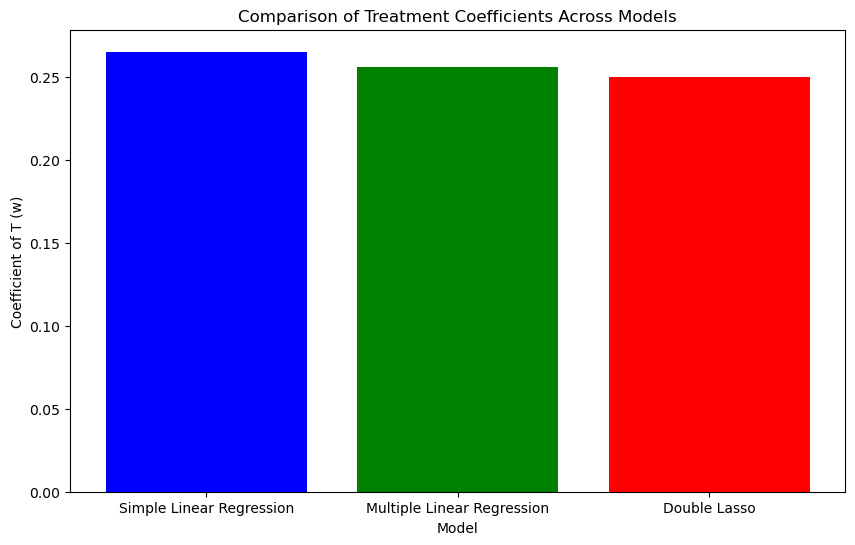

In [4]:
#Comparación entre los coeficientes: regresión lineal, regresión lineal con controles, Double Lasso con controles

import matplotlib.pyplot as plt

X_simple = sm.add_constant(data['w'])
model1 = sm.OLS(Y, X_simple).fit()

model2 = model

coefficients = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression', 'Double Lasso'],
    'Coefficient': [model1.params['w'], model2.params['w'], lasso_coef['w']]
})

plt.figure(figsize=(10, 6))
plt.bar(coefficients['Model'], coefficients['Coefficient'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Coefficient of T (w)')
plt.title('Comparison of Treatment Coefficients Across Models')
plt.show()

# Non-Linear Methods DML

In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
# Upload data
data = pd.read_csv('/Users/fernandaamartel/Downloads/processed_esti.csv')

In [69]:
# Print data
print(data.head())

   y  w  gender_female  gender_male  gender_transgender  ethnicgrp_asian  \
0  1  1              0            1                   0                0   
1  0  0              0            1                   0                0   
2  0  1              0            1                   0                0   
3  0  0              1            0                   0                0   
4  1  1              1            0                   0                1   

   ethnicgrp_black  ethnicgrp_mixed_multiple  ethnicgrp_other  \
0                0                         1                0   
1                0                         0                0   
2                1                         0                0   
3                0                         0                0   
4                0                         0                0   

   ethnicgrp_white  partners1  postlaunch  msm  age  imd_decile  
0                0          0           1    0   27           5  
1                1  

In [70]:
y = data['y'] 
T = data['w'] 
X = data.drop(columns=['y', 'w'])

In [71]:
X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(X, y, T, test_size=0.2, random_state=42)

## Lasso

In [72]:
model_t = Lasso(alpha=0.1)
model_t.fit(X_train, T_train)
T_pred = model_t.predict(X_test)

In [73]:
model_y = Lasso(alpha=0.1)
model_y.fit(X_train, y_train)
y_pred = model_y.predict(X_test)

In [74]:
residuals_T = T_test.values - T_pred
residuals_Y = y_test.values - y_pred

In [75]:
model_effect = Lasso(alpha=0.1)
model_effect.fit(residuals_T.reshape(-1, 1), residuals_Y)
treatment_effects = model_effect.coef_[0]

In [76]:
print(f"Estimated Treatment Effect: {treatment_effects:.4f}")

Estimated Treatment Effect: 0.0000


#### Interpretation:

There is no statistically significant relationship between the treatment variable and the dependent variable.

## Regression Trees

In [77]:
# Fit Random Forest for Y
model_y = RandomForestRegressor(random_state=42)
model_y.fit(X_train, y_train)

# Fit Random Forest for T
model_t = RandomForestRegressor(random_state=42)
model_t.fit(X_train, T_train)

RandomForestRegressor(random_state=42)

In [78]:
y_pred = model_y.predict(X_test)
T_pred = model_t.predict(X_test)

In [79]:
residuals_y = y_test - y_pred
residuals_t = T_test - T_pred

In [80]:
residuals_y = residuals_y.values.reshape(-1, 1)
residuals_t = residuals_t.values.reshape(-1, 1)

In [81]:
model_effect = RandomForestRegressor(random_state=42)
model_effect.fit(residuals_t, residuals_y)

/var/folders/_t/77pjth2j05lf_rl53gvvpwh80000gn/T/ipykernel_61645/756431601.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_effect.fit(residuals_t, residuals_y)


RandomForestRegressor(random_state=42)

In [82]:
treatment_effects = model_effect.predict(residuals_t)

In [83]:
mse_y = mean_squared_error(y_test, y_pred)
mse_t = mean_squared_error(T_test, T_pred)

In [84]:
results_table = pd.DataFrame({
    "Metric": ["Mean Squared Error (Y)", "Mean Squared Error (T)", "Estimated Treatment Effect"],
    "Value": [mse_y, mse_t, treatment_effects[0]]  # Assuming treatment_effects is a single value
})

print("Results:")
print(results_table)

Results:
                       Metric     Value
0      Mean Squared Error (Y)  0.259589
1      Mean Squared Error (T)  0.334393
2  Estimated Treatment Effect  0.124282


#### Interpretation

The treatment is estimated to have a causal effect on the Y: the expected increase in Y, on average, is 12.43%.

## Boosting Trees

In [85]:
model_y = GradientBoostingRegressor(random_state=42)
model_y.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [86]:
model_t = GradientBoostingRegressor(random_state=42)
model_t.fit(X_train, T_train)

GradientBoostingRegressor(random_state=42)

In [87]:
model_y = GradientBoostingRegressor(random_state=42)
model_y.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [88]:
model_t = GradientBoostingRegressor(random_state=42)
model_t.fit(X_train, T_train)

GradientBoostingRegressor(random_state=42)

In [89]:
y_pred = model_y.predict(X_test)
T_pred = model_t.predict(X_test)

In [90]:
residuals_y = y_test - y_pred
residuals_t = T_test - T_pred

In [91]:
residuals_y = residuals_y.values.reshape(-1, 1)
residuals_t = residuals_t.values.reshape(-1, 1)

In [92]:
model_effect = GradientBoostingRegressor(random_state=42)
model_effect.fit(residuals_t, residuals_y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [93]:
treatment_effects = model_effect.predict(residuals_t)

In [94]:
mse_y = mean_squared_error(y_test, y_pred)
mse_t = mean_squared_error(T_test, T_pred)

In [95]:
results_table = pd.DataFrame({
    "Metric": ["Mean Squared Error (Y)", "Mean Squared Error (T)", "Estimated Treatment Effect"],
    "Value": [mse_y, mse_t, treatment_effects[0]]  # Assuming treatment_effects is a single value
})

print("Results:")
print(results_table)

Results:
                       Metric     Value
0      Mean Squared Error (Y)  0.246823
1      Mean Squared Error (T)  0.271580
2  Estimated Treatment Effect -0.066796


#### Interpretation:

The treatment is estimated to have a negative causal effect on the Y: with the treatment, the expected decreaese in Y, on average is 6.68%.

## Regression forest

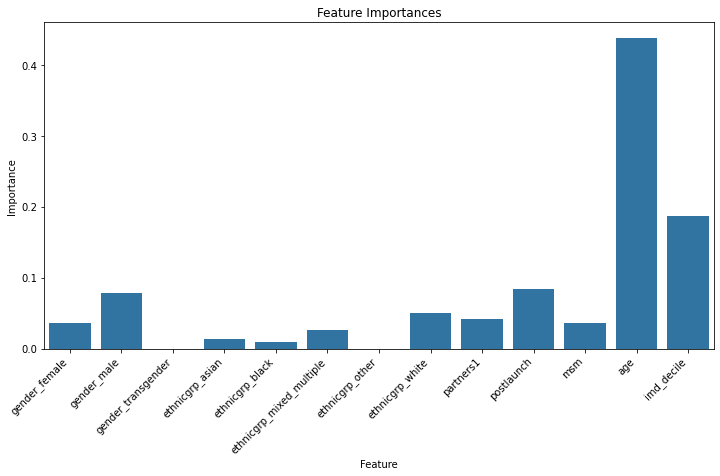

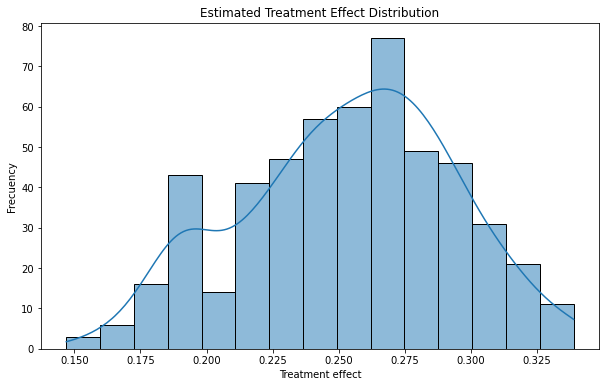

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from econml.dml import CausalForestDML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('C:/Users/Frank/Downloads/processed_esti.csv')

feature_columns = [
    'gender_female', 'gender_male', 'gender_transgender',
    'ethnicgrp_asian', 'ethnicgrp_black', 'ethnicgrp_mixed_multiple', 
    'ethnicgrp_other', 'ethnicgrp_white', 'partners1', 'postlaunch', 
    'msm', 'age', 'imd_decile'
]

treatment_column = 'w'
target_column = 'y'

X = data[feature_columns]
T = data[treatment_column]
y = data[target_column]

X_train, X_test, T_train, T_test, y_train, y_test = train_test_split(X, T, y, test_size=0.3, random_state=77)

est = CausalForestDML(n_estimators=1000,
                      min_samples_leaf=10,
                      max_depth=3,
                      random_state=77)

est = est.fit(Y=y_train, X=X_train, T=T_train)

feature_importances = est.feature_importances_

treatment_effects = est.effect(X_test)
te_lower, te_upper = est.effect_interval(X_test)
results_df = pd.DataFrame({
    'treatment_effect': treatment_effects,
    'te_lower': te_lower,
    'te_upper': te_upper
})

importances_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=importances_df, color='C0')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(results_df['treatment_effect'], kde=True)
plt.title('Estimated Treatment Effect Distribution')
plt.xlabel('Treatment effect')
plt.ylabel('Frecuency')
plt.show()
###

In [16]:
results_df['treatment_effect'].mean()

0.25335167673397985

In [17]:
results_df['treatment_effect'].std()

0.039901782238421286

## All results

               label         r   moerror
0              lasso  0.000000  0.000000
1   regression trees  0.124282  0.259589
2     boosting trees -0.066796  0.246823
3  regression forest  0.253000  0.039000


<AxesSubplot:xlabel='Pearson correlation', ylabel='Confidence interval'>

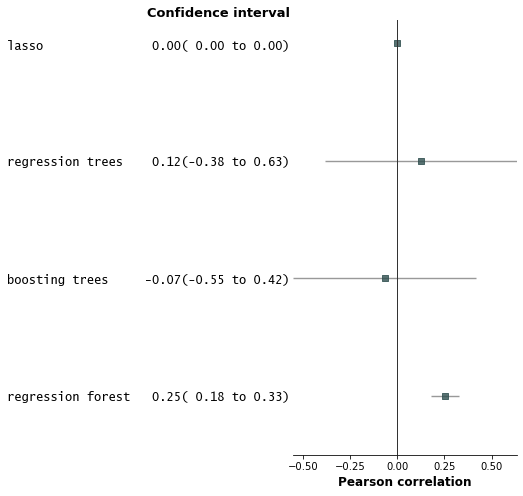

In [10]:
import forestplot as fp

total = [
    {'label': 'lasso', 'r': 0, 'moerror': 0},
    {'label': 'regression trees', 'r': 0.124282, 'moerror': 0.259589},
    {'label': 'boosting trees', 'r': -0.066796, 'moerror': 0.246823},
    {'label': 'regression forest', 'r': 0.253, 'moerror': 0.039}
]

tot = pd.DataFrame(total)
print(tot)
tot['ll'] = tot['r'] - 1.96 * tot['moerror']
tot['hl'] = tot['r'] + 1.96 * tot['moerror']

fp.forestplot(df,  # the dataframe with results data
              estimate="r",  # col containing estimated effect size 
              ll="ll", hl="hl",  # columns containing conf. int. lower and higher limits
              varlabel="label",  # column containing variable label
              ylabel="Confidence interval",  # y-label title
              xlabel="Pearson correlation",  # x-label title
              )

The coefficients for regression trees and regression forest are positive, suggesting a direct effect between offering electronic tests and individuals using one of these tests. This aligns with the findings in the paper. We would choose regression forest because it offers greater accuracy and stability due to its method of averaging multiple trees, which reduces the risk of overfitting and improves predictive capability compared to a single regression tree